In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Clusterization with population size included

## Principal components

In [49]:
df = pd.read_csv('pca_with_pop.csv', index_col=0); df

,PC1,PC2,PC3,PC4,PC5,PC6
Denmark,4.315839,-0.170918,0.128668,0.156294,1.215609,-0.105383
New Zealand,3.953155,-0.198959,0.327397,-0.178489,0.472299,-0.218745
Finland,4.070322,-0.073885,0.271211,-0.039045,0.687483,-0.220668
Singapore,2.490263,-0.982601,-0.296501,0.522302,0.438314,1.866649
Sweden,4.268781,0.084355,-0.173187,0.196865,0.847751,-0.384664
...,...,...,...,...,...,...
Sudan,-3.419729,-0.449528,-0.601406,0.051302,0.520019,0.208263
Burundi,-3.921928,-0.953848,0.342084,-0.116432,0.874019,0.244964
Turkmenistan,-2.636468,-1.548443,0.064168,1.367045,0.126244,0.495761
Yemen,-3.827408,-0.576259,-0.322786,0.198678,0.444584,0.463260


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 , the average silhouette_score is : 0.4000501320036819


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 , the average silhouette_score is : 0.28385048620368025


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 , the average silhouette_score is : 0.3079096788787074


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 , the average silhouette_score is : 0.29730759281067193


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 , the average silhouette_score is : 0.2666654167410963


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 , the average silhouette_score is : 0.2606166903471121


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 , the average silhouette_score is : 0.26389820135060515


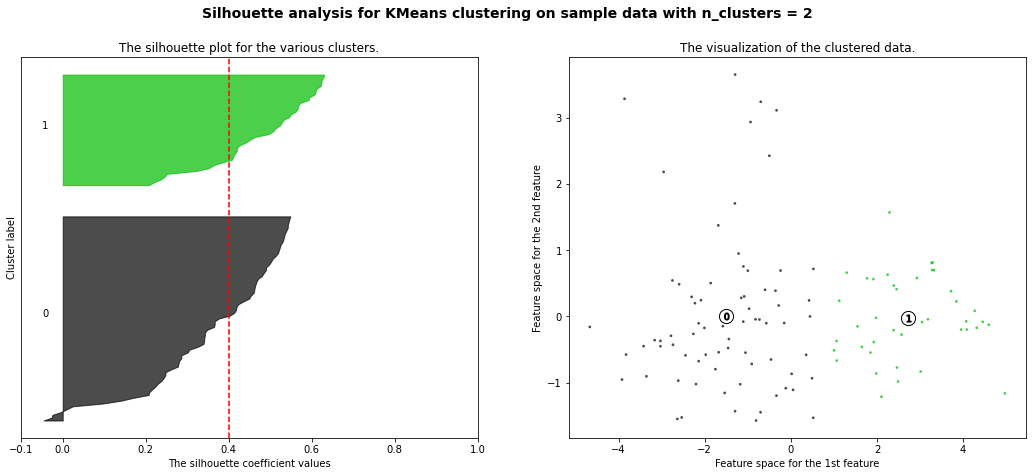

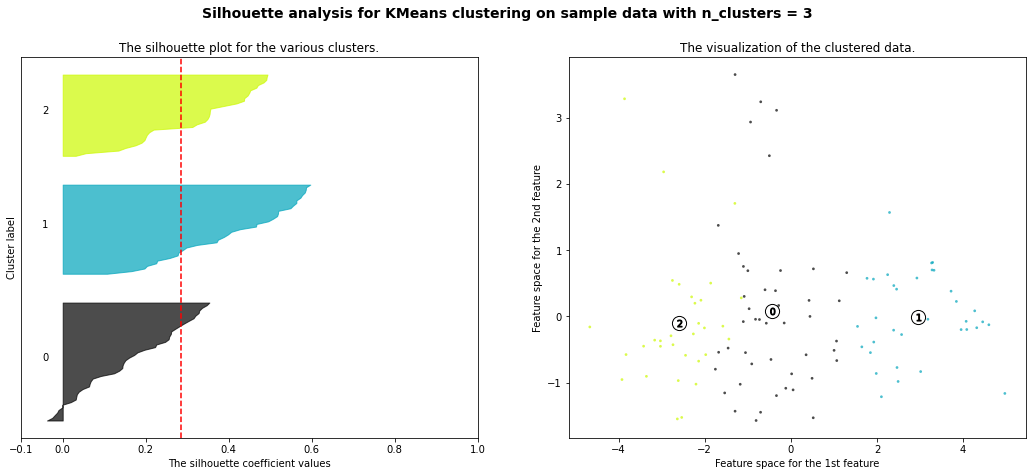

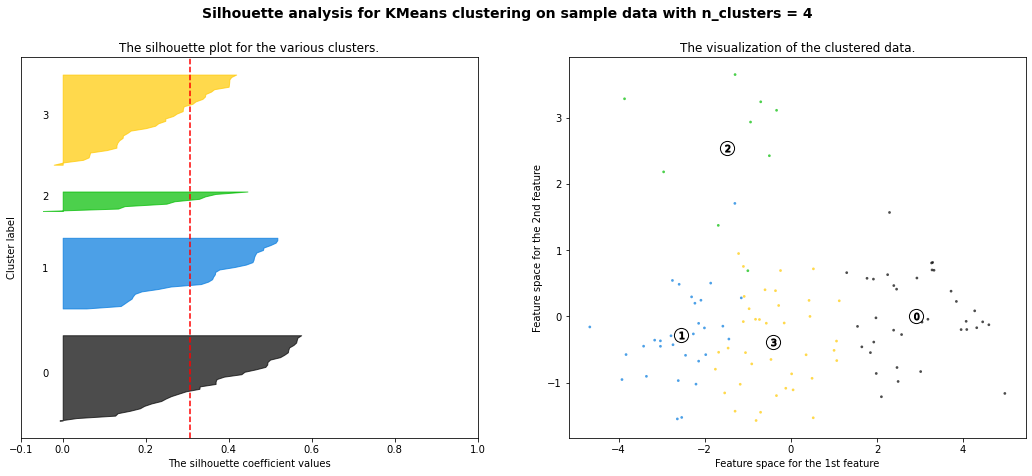

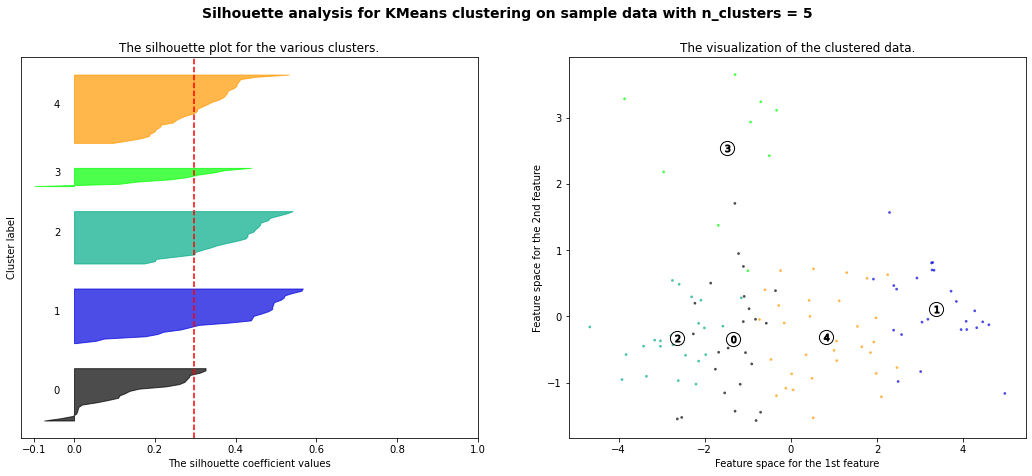

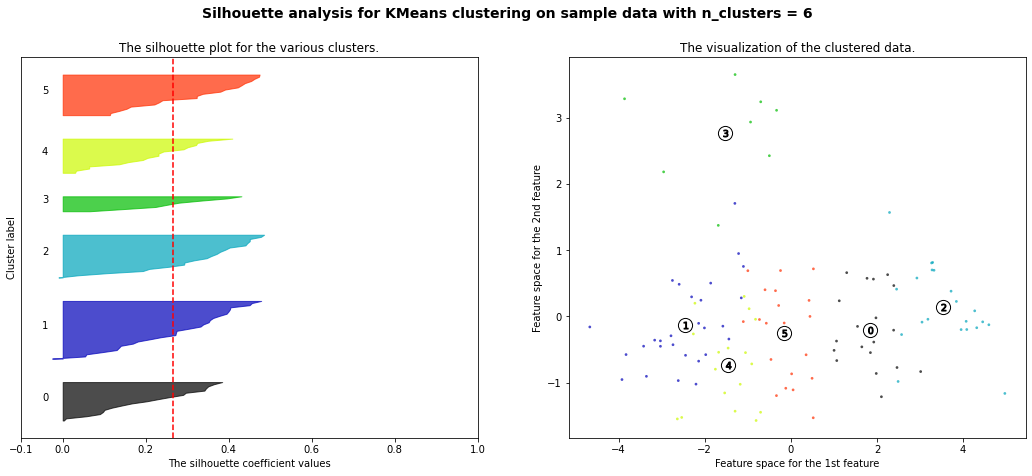

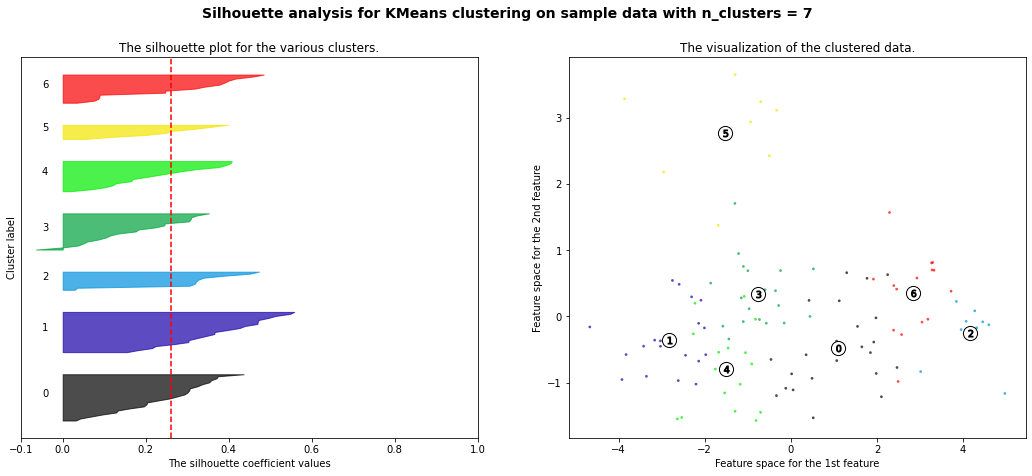

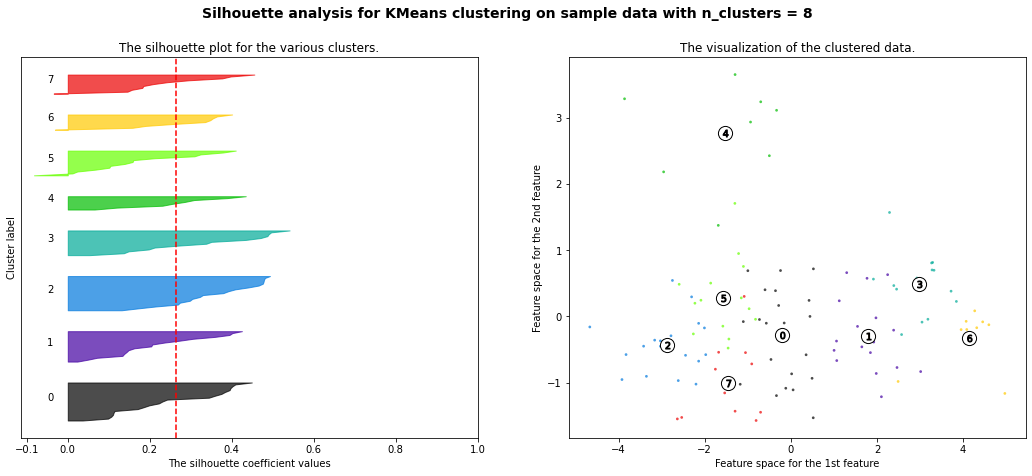

In [50]:
for n_clusters in range(2, 9):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=8)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        ", the average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df.PC1, df.PC2, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",)


plt.show()    

The best results are achieved with two clusters, although a few items in cluster 0 seem to be misclassified.

## Original features

In [43]:
df = pd.read_csv('df.csv', index_col='country'); df

,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,religion_important,log_pop
country,,,,,,,,,
Denmark,2.179303,1.542165,1.227743,2.062304,1.239562,-0.537611,0.934099,-2.037192,-0.713071
New Zealand,2.179303,1.589498,1.297354,1.260407,1.179606,-0.573944,1.129749,-1.478447,-0.844456
Finland,2.179303,1.565831,1.332159,1.476308,1.226239,-0.464943,1.073849,-1.677999,-0.742730
Singapore,2.024746,0.065386,-0.477729,1.908247,1.226239,-0.634501,1.311424,-0.001766,-0.709150
Sweden,2.024746,1.594231,1.332159,1.700317,1.272871,-0.525499,1.199624,-2.117012,-0.326278
...,...,...,...,...,...,...,...,...,...
Sudan,-1.323995,-1.586524,-1.556701,-0.689113,-1.625002,-0.041050,-1.246001,0.916171,0.687959
Burundi,-1.375514,-1.775854,-1.661118,-0.740832,-2.137959,0.080063,-1.763076,1.115723,-0.270861
Turkmenistan,-1.375514,-1.974651,-2.078784,-0.428502,-0.259338,-0.150051,-0.840726,0.397337,-0.692751


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 , the average silhouette_score is : 0.3893154114335999


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 , the average silhouette_score is : 0.2648958182919887


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 , the average silhouette_score is : 0.2938191323031857


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 , the average silhouette_score is : 0.2872697575597493


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 , the average silhouette_score is : 0.2590636654717328


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 , the average silhouette_score is : 0.2502859102543072


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 , the average silhouette_score is : 0.24578964653464327


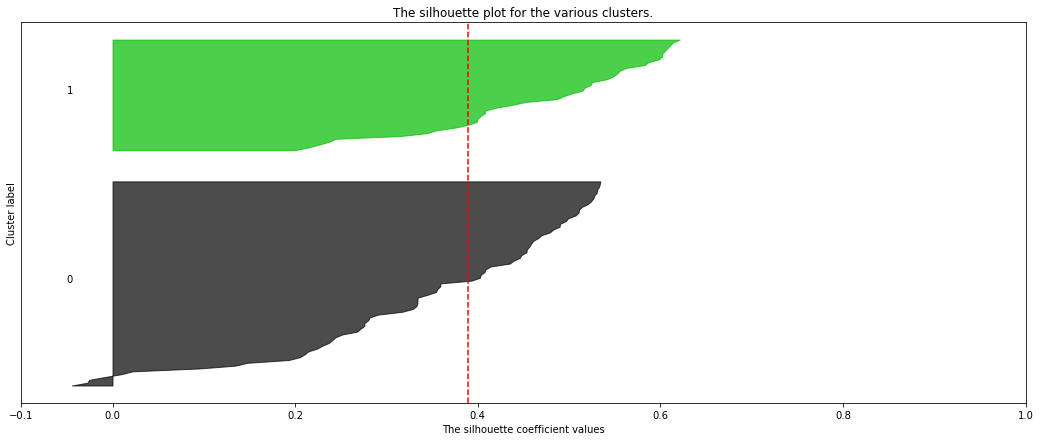

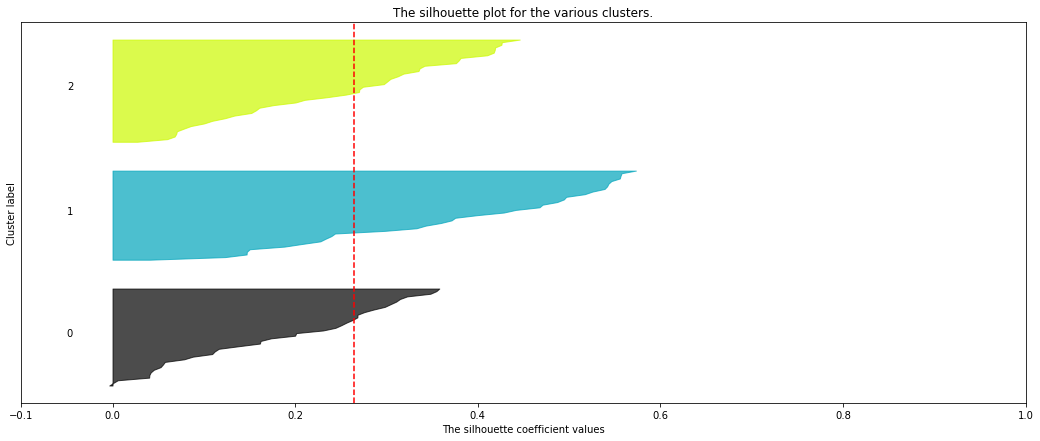

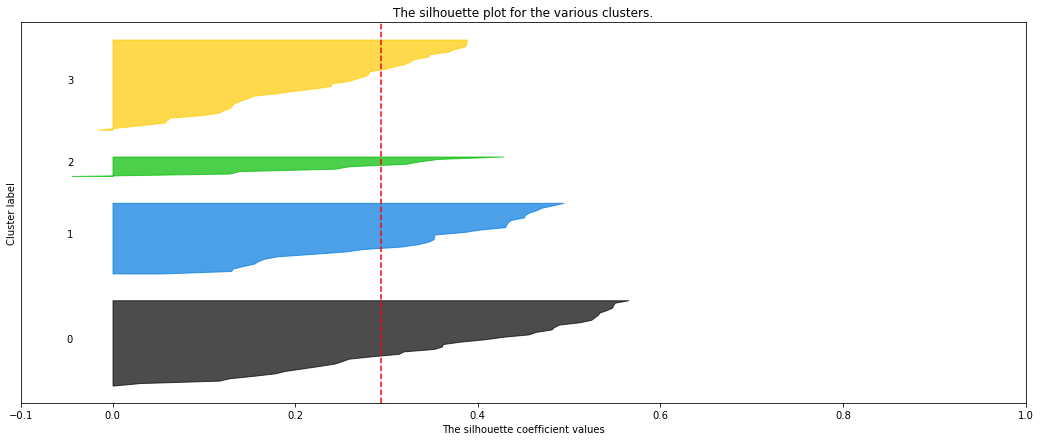

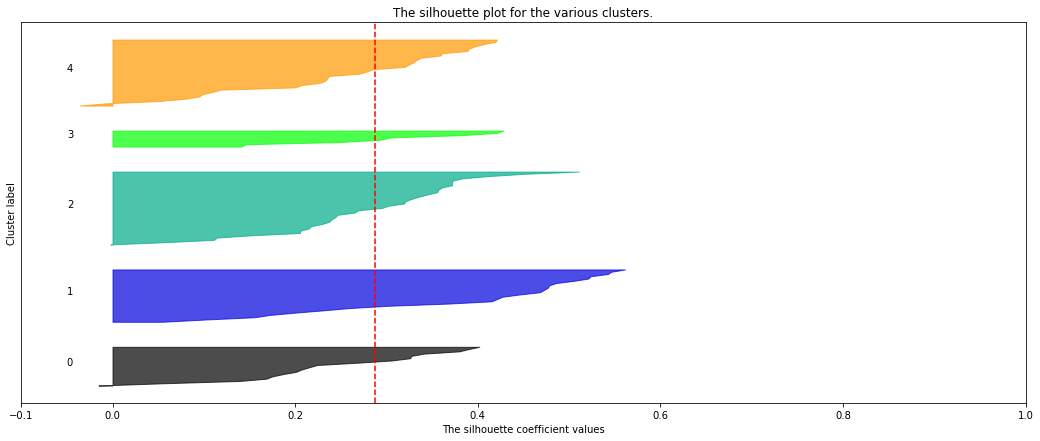

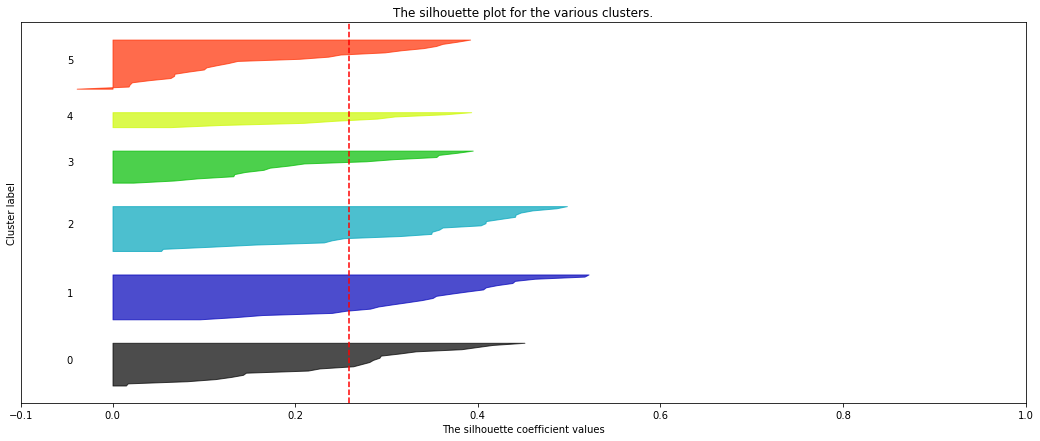

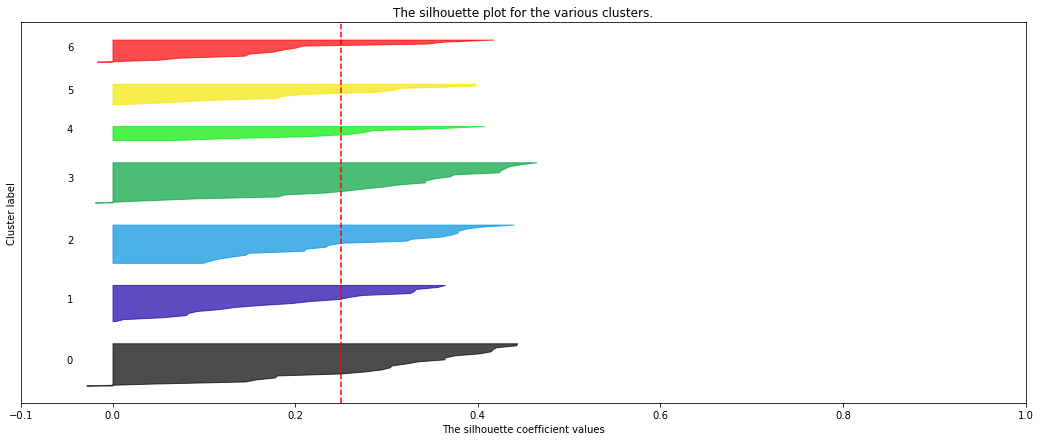

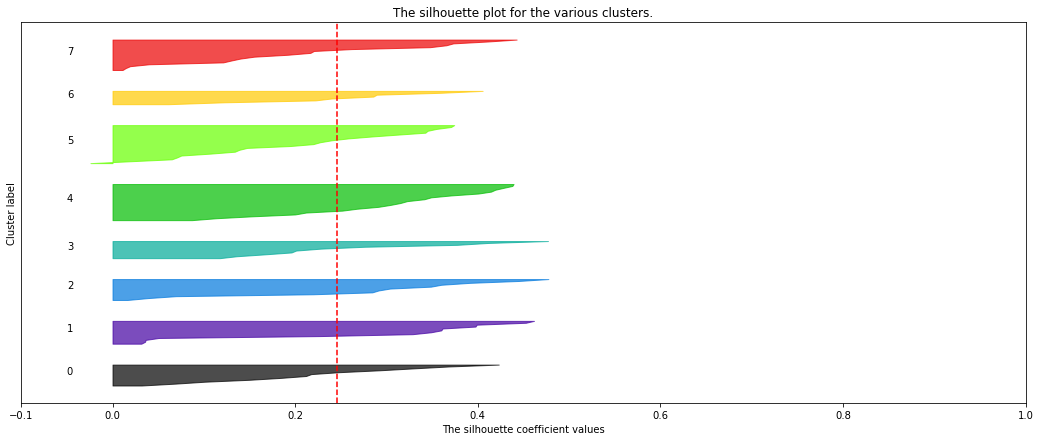

In [45]:
for n_clusters in range(2, 9):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=8)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        ", the average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()    

PCA yields slightly better clustering.

## Analysis of results for two clusters (after PCA)

In [30]:
df = pd.read_csv('pca_with_pop.csv', index_col=0); df

,PC1,PC2,PC3,PC4,PC5,PC6
Denmark,4.315839,-0.170918,0.128668,0.156294,1.215609,-0.105383
New Zealand,3.953155,-0.198959,0.327397,-0.178489,0.472299,-0.218745
Finland,4.070322,-0.073885,0.271211,-0.039045,0.687483,-0.220668
Singapore,2.490263,-0.982601,-0.296501,0.522302,0.438314,1.866649
Sweden,4.268781,0.084355,-0.173187,0.196865,0.847751,-0.384664
...,...,...,...,...,...,...
Sudan,-3.419729,-0.449528,-0.601406,0.051302,0.520019,0.208263
Burundi,-3.921928,-0.953848,0.342084,-0.116432,0.874019,0.244964
Turkmenistan,-2.636468,-1.548443,0.064168,1.367045,0.126244,0.495761
Yemen,-3.827408,-0.576259,-0.322786,0.198678,0.444584,0.463260


In [32]:
n_clusters = 2
clusterer = KMeans(n_clusters, random_state=8)
cluster_labels = clusterer.fit_predict(df)

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
sample_silhouette_values = silhouette_samples(df, cluster_labels)

In [35]:
df['cluster'] = cluster_labels
df['s'] = sample_silhouette_values
df

,PC1,PC2,PC3,PC4,PC5,PC6,cluster,s
Denmark,4.315839,-0.170918,0.128668,0.156294,1.215609,-0.105383,1,0.594364
New Zealand,3.953155,-0.198959,0.327397,-0.178489,0.472299,-0.218745,1,0.623756
Finland,4.070322,-0.073885,0.271211,-0.039045,0.687483,-0.220668,1,0.621503
Singapore,2.490263,-0.982601,-0.296501,0.522302,0.438314,1.866649,1,0.413988
Sweden,4.268781,0.084355,-0.173187,0.196865,0.847751,-0.384664,1,0.609836
...,...,...,...,...,...,...,...,...
Sudan,-3.419729,-0.449528,-0.601406,0.051302,0.520019,0.208263,0,0.539148
Burundi,-3.921928,-0.953848,0.342084,-0.116432,0.874019,0.244964,0,0.505575
Turkmenistan,-2.636468,-1.548443,0.064168,1.367045,0.126244,0.495761,0,0.467049
Yemen,-3.827408,-0.576259,-0.322786,0.198678,0.444584,0.463260,0,0.525204


Add original features for analysis

In [41]:
df = df.join(pd.read_csv('df.csv', index_col='country')); df

,PC1,PC2,PC3,PC4,PC5,PC6,cluster,s,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,religion_important,log_pop
Denmark,4.315839,-0.170918,0.128668,0.156294,1.215609,-0.105383,1,0.594364,2.179303,1.542165,1.227743,2.062304,1.239562,-0.537611,0.934099,-2.037192,-0.713071
New Zealand,3.953155,-0.198959,0.327397,-0.178489,0.472299,-0.218745,1,0.623756,2.179303,1.589498,1.297354,1.260407,1.179606,-0.573944,1.129749,-1.478447,-0.844456
Finland,4.070322,-0.073885,0.271211,-0.039045,0.687483,-0.220668,1,0.621503,2.179303,1.565831,1.332159,1.476308,1.226239,-0.464943,1.073849,-1.677999,-0.742730
Singapore,2.490263,-0.982601,-0.296501,0.522302,0.438314,1.866649,1,0.413988,2.024746,0.065386,-0.477729,1.908247,1.226239,-0.634501,1.311424,-0.001766,-0.709150
Sweden,4.268781,0.084355,-0.173187,0.196865,0.847751,-0.384664,1,0.609836,2.024746,1.594231,1.332159,1.700317,1.272871,-0.525499,1.199624,-2.117012,-0.326278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sudan,-3.419729,-0.449528,-0.601406,0.051302,0.520019,0.208263,0,0.539148,-1.323995,-1.586524,-1.556701,-0.689113,-1.625002,-0.041050,-1.246001,0.916171,0.687959
Burundi,-3.921928,-0.953848,0.342084,-0.116432,0.874019,0.244964,0,0.505575,-1.375514,-1.775854,-1.661118,-0.740832,-2.137959,0.080063,-1.763076,1.115723,-0.270861
Turkmenistan,-2.636468,-1.548443,0.064168,1.367045,0.126244,0.495761,0,0.467049,-1.375514,-1.974651,-2.078784,-0.428502,-0.259338,-0.150051,-0.840726,0.397337,-0.692751
Yemen,-3.827408,-0.576259,-0.322786,0.198678,0.444584,0.463260,0,0.525204,-1.530071,-1.865786,-1.765534,-0.711010,-1.891473,0.164842,-1.134201,1.155633,0.419489


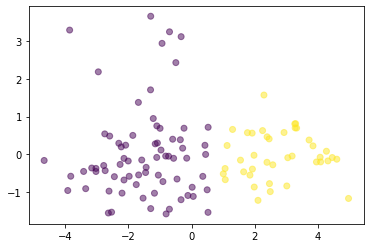

In [39]:
plt.scatter(df.PC1, y=df.PC2, c=df.cluster, alpha=0.5)
plt.show()

The divide is based on PC1, i.e. combined GDP per capita, life expectancy, corruption, etc. PC2 (homicide, population) is less important.